# Polar plots (azimuth, elevation)

**Links**

- https://pt.wikipedia.org/wiki/Sistema_horizontal_de_coordenadas
- https://matplotlib.org/examples/pylab_examples/polar_demo.html

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
"""
Demo of a line plot on a polar axis.
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def degrees_to_radians(degrees):
    radians = (degrees * np.pi) / 180.0
    return radians
    
def azimuth_to_theta(az):
    '''input:  azimuth (degrees)
       output: angle in radians (radians)'''
    az = degrees_to_radians(az)
    theta = np.pi / 2.0 - az
    return theta

"""Yuri: Pontos com elevacao negativa podem aparecer, com r maior que 90. O ideal seria
   fazer uma linha identificando a linha do horizonte r = 90. O que esta dentro e visivel
   e o que esta fora nao e"""


def elevation_to_radius(el):
    '''input:  azimuth (degrees) []
       output: angle in radians (radians)'''
    
    el = abs(el)
    if el > 90.0:
        raise ValueError('Elevation must be in [-90.0, +90.0]')
    radius = 90.0 - el
    return radius

def is_point_visible(y):
    return y >= 0.0

def split_visible_points(x, y):
    visible = []
    invisible = []
    
    for i, yi in enumerate(y):
        point = (x[i], yi)
        if is_point_visible(yi):
            visible.append(point)
        else:
            invisible.append(point)
    return visible, invisible

def az_el_to_theta_radius(az_el):
    theta_radius = tuple((azimuth_to_theta(x), elevation_to_radius(y)) for x, y in az_el)
    return theta_radius

In [3]:
print(elevation_to_radius(89))

1.0


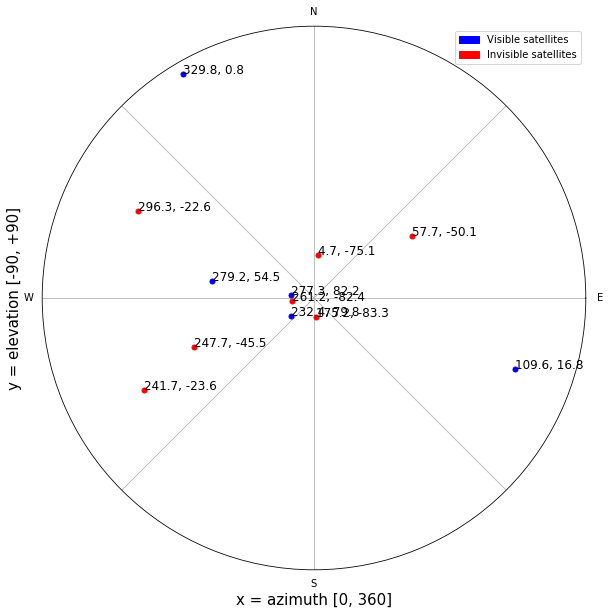

In [4]:
"""Yuri: Esta trocado. No caso, Elevation eh r, e Azimuth eh theta"""


def plot_az_el(az, el):
    plt.figure(num=1, figsize=(10, 10)) 
    
    visible, invisible = split_visible_points(az, el)   
    points_color = {
        'b': az_el_to_theta_radius(visible),
        'r': az_el_to_theta_radius(invisible),
    }
    
    ax = plt.subplot(projection='polar')
    
    for color, points in points_color.items():
        if not points:
            continue 
            
        x, y = list(zip(*points))
        ax.plot(x, y, marker='o', linestyle='', ms=5, color=color)
        
    for i in range(len(az)):
        x = azimuth_to_theta(az[i])
        y = elevation_to_radius(el[i])
        label = '{:.1f}, {:.1f}'.format(az[i], el[i])
        ax.annotate(label, (x, y), fontsize=12)

    """Yuri: Colocar ticks pra r = 30, 60, 90"""        
        
    ax.set_rticks([])
    ax.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])
    ax.set_xlabel('x = azimuth [0, 360]', fontsize=15)
    ax.set_ylabel('y = elevation [-90, +90]', fontsize=15, labelpad=20)
    
    visible_patch = mpatches.Patch(color='b', label='Visible satellites')
    invisible_patch = mpatches.Patch(color='r', label='Invisible satellites')
    
    plt.legend(handles=[visible_patch, invisible_patch])

n = 12
az = np.random.uniform(size=n) * 360.0
el = np.random.uniform(low=-1.0, high=1.0, size=n) * 90.0

plot_az_el(az, el) 

In [5]:
print(az,el)

[261.15652493 109.56413634 329.75723988   4.7402475  247.74531971
 232.40090701 175.23032576 279.20062684  57.74238516 277.26665633
 241.74857324 296.28080632] [-82.42159489  16.77505211   0.81853234 -75.09101772 -45.52948144
  79.84756146 -83.29194435  54.54842294 -50.14160208  82.18206323
 -23.58318731 -22.63691588]
